In [2]:
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import numpy as np

# Statistical relation among data variables

## 1D

In [3]:
DATA_DIR_1D = './data/1D/evaluation_data'
DATA_DIR_2D = './data/2D/evaluation_data'

csv_list_1d = os.listdir(DATA_DIR_1D)
csv_list_2d = os.listdir(DATA_DIR_2D)

In [4]:
df_1 = pd.read_csv(os.path.join(DATA_DIR_1D, csv_list_1d[0]))
df_1.head()

,noisy motion,kalman prediction,ground truth,motion noise stdev,laser noise stdev,laser range 1,laser range 2,laser range 3,laser range 4,laser range 5,laser range 6
0,477.562225,2.805372,3.452534,2,10,0.120000,13.867054,4.818243,0.120000,0.120000,0.120000
1,478.114466,5.694307,4.396296,2,10,17.214054,0.120000,0.120000,0.120000,18.769865,17.948696
2,477.344596,6.699805,5.094662,2,10,0.120000,22.884930,4.004105,1.838169,30.500000,8.486197
3,477.348436,7.841598,5.827539,2,10,12.918326,7.868069,9.924576,0.120000,7.979156,0.120000
4,476.060541,7.745375,6.220115,2,10,14.638962,7.620269,0.120000,0.120000,1.204028,27.136044


In [5]:
df_1.columns

Index(['noisy motion', 'kalman prediction', 'ground truth',
       'motion noise stdev', 'laser noise stdev', 'laser range 1',
       'laser range 2', 'laser range 3', 'laser range 4', 'laser range 5',
       'laser range 6'],
      dtype='object')

In [6]:
# find correlation among vars
corr = df_1.dropna().corr()
gt_corr_1 = corr['ground truth'].sort_values(ascending=False).to_dict()

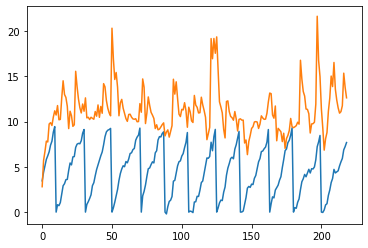

In [7]:
# plt.scatter(df_1['ground truth'], df_1['kalman prediction'])
plt.plot(df_1['ground truth'], label='ground truth')
plt.plot(df_1['kalman prediction'], label='kalman prediction')


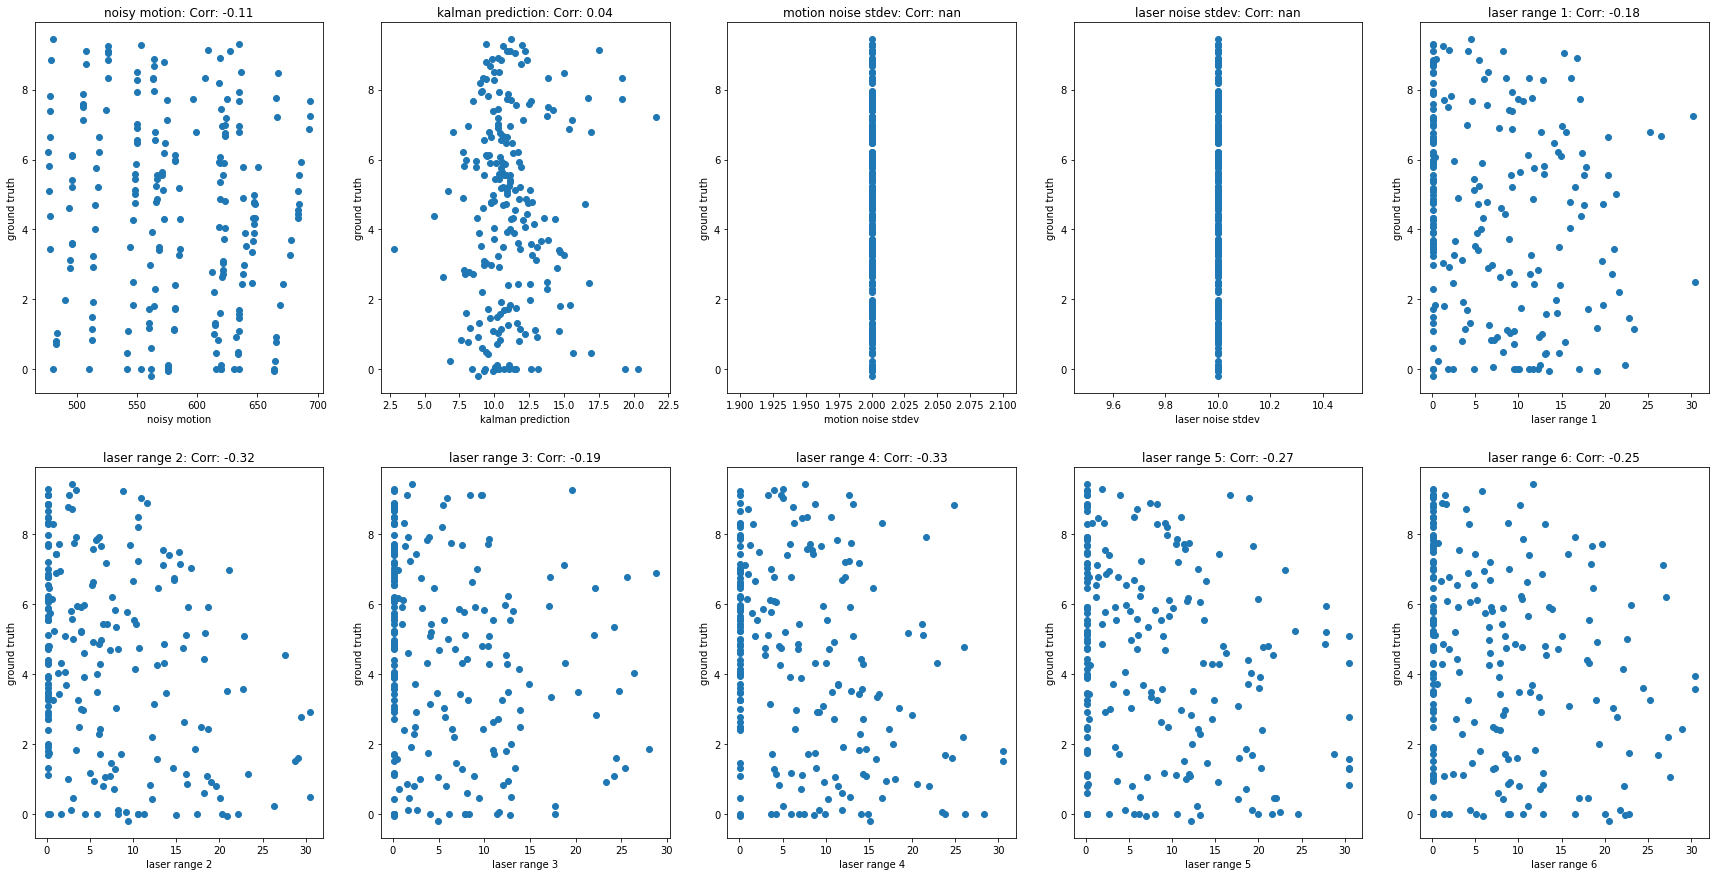

In [8]:
cols = ['noisy motion', 'kalman prediction', 'motion noise stdev', 'laser noise stdev', 'laser range 1',
       'laser range 2', 'laser range 3', 'laser range 4', 'laser range 5',
       'laser range 6']

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,15))
for i in range(1, len(cols)+1):
    # print(df_1.columns[i-1])
    # if df_1.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(2,5,i)
    plt.scatter(df_1[cols[i-1]], df_1['ground truth'])
    # plt.plot(df_1[cols[i-1]][:100])
    # plt.plot(df_1['ground truth'][:100])
    plt.xlabel(cols[i-1])
    plt.ylabel('ground truth')
    # add correlation legend
    # plt.text(0.9, 1, 'corr: {:.2f}'.format(gt_corr_1[cols[i-1]]), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title(f'{cols[i-1]}: Corr: {gt_corr_1[cols[i-1]]:.2f}')

plt.show()

## 2D

In [9]:
df_2 = pd.read_csv(os.path.join(DATA_DIR_2D, csv_list_2d[1]))
df_2.head()

,noisy_motion_x,noisy_motion_y,noisy_motion_theta,noisy_motion_cov_xx,noisy_motion_cov_xy,noisy_motion_cov_xtheta,noisy_motion_cov_yy,noisy_motion_cov_ytheta,noisy_motion_cov_thetatheta,kalman_prediction_x,...,ground_truth_x,ground_truth_y,ground_truth_theta,alpha,ekf_pos_x,ekf_pos_y,ekf_pos_theta,ukf_pos_x,ukf_pos_y,ukf_pos_theta
0,-0.000024,0.000011,0.000665,1.109525e-09,-5.201825e-10,-3.013763e-08,2.438789e-10,1.412953e-08,8.186173e-07,-0.000261,...,-0.001867,0.005961,0.064426,4,-2.640473e-07,-1.393439e-07,0.064977,0.001042,-0.001393,0.000425
1,0.000022,-0.000010,-0.000601,1.126628e-09,-5.220797e-10,-3.055308e-08,2.419318e-10,1.415830e-08,8.285706e-07,-0.000257,...,-0.001875,0.005964,0.064654,4,-4.783296e-07,-2.529660e-07,0.065214,-0.000280,-0.001095,0.000652
2,0.000012,-0.000006,-0.000334,1.143981e-09,-5.239461e-10,-3.097369e-08,2.399686e-10,1.418602e-08,8.386235e-07,-0.000258,...,-0.001884,0.005968,0.064883,4,-7.488159e-07,-3.971269e-07,0.065448,-0.000579,-0.004228,0.000889
3,-0.000020,0.000009,0.000545,1.161555e-09,-5.257936e-10,-3.139861e-08,2.380077e-10,1.421301e-08,8.487524e-07,-0.000257,...,-0.001892,0.005972,0.065113,4,-1.080164e-06,-5.739256e-07,0.065683,0.000041,0.000336,0.001123
4,-0.000014,0.000006,0.000376,1.179345e-09,-5.276010e-10,-3.182770e-08,2.360316e-10,1.423868e-08,8.589532e-07,-0.000256,...,-0.001901,0.005976,0.065345,4,-1.474731e-06,-7.851807e-07,0.065920,-0.001027,-0.006425,0.001358


In [10]:
cols_2 = [i for i in df_2.columns if 'ground_truth' not in i]
len(cols_2), cols_2

(28,
 ['noisy_motion_x',
  'noisy_motion_y',
  'noisy_motion_theta',
  'noisy_motion_cov_xx',
  'noisy_motion_cov_xy',
  'noisy_motion_cov_xtheta',
  'noisy_motion_cov_yy',
  'noisy_motion_cov_ytheta',
  'noisy_motion_cov_thetatheta',
  'kalman_prediction_x',
  'kalman_prediction_y',
  'kalman_prediction_theta',
  'lidar_x',
  'lidar_y',
  'lidar_theta',
  'lidar_cov_xx',
  'lidar_cov_xy',
  'lidar_cov_xtheta',
  'lidar_cov_yy',
  'lidar_cov_ytheta',
  'lidar_cov_thetatheta',
  'alpha',
  'ekf_pos_x',
  'ekf_pos_y',
  'ekf_pos_theta',
  'ukf_pos_x',
  'ukf_pos_y',
  'ukf_pos_theta'])

In [11]:
# find correlation among vars
corr_2 = df_2.dropna().corr()

gt_corr_x_2 = corr_2['ground_truth_x'].sort_values(ascending=False).to_dict()

gt_corr_y_2 = corr_2['ground_truth_y'].sort_values(ascending=False).to_dict()

gt_corr_theta_2 = corr_2['ground_truth_theta'].sort_values(ascending=False).to_dict()

### vs GT X

noisy_motion_x
noisy_motion_y
noisy_motion_theta
noisy_motion_cov_xx
noisy_motion_cov_xy
noisy_motion_cov_xtheta
noisy_motion_cov_yy
noisy_motion_cov_ytheta
noisy_motion_cov_thetatheta
kalman_prediction_x
kalman_prediction_y
kalman_prediction_theta
lidar_x
lidar_y
lidar_theta
lidar_cov_xx
lidar_cov_xy
lidar_cov_xtheta
lidar_cov_yy
lidar_cov_ytheta
lidar_cov_thetatheta
ground_truth_x
ground_truth_y
ground_truth_theta
alpha
ekf_pos_x


ValueError: num must be 1 <= num <= 25, not 26

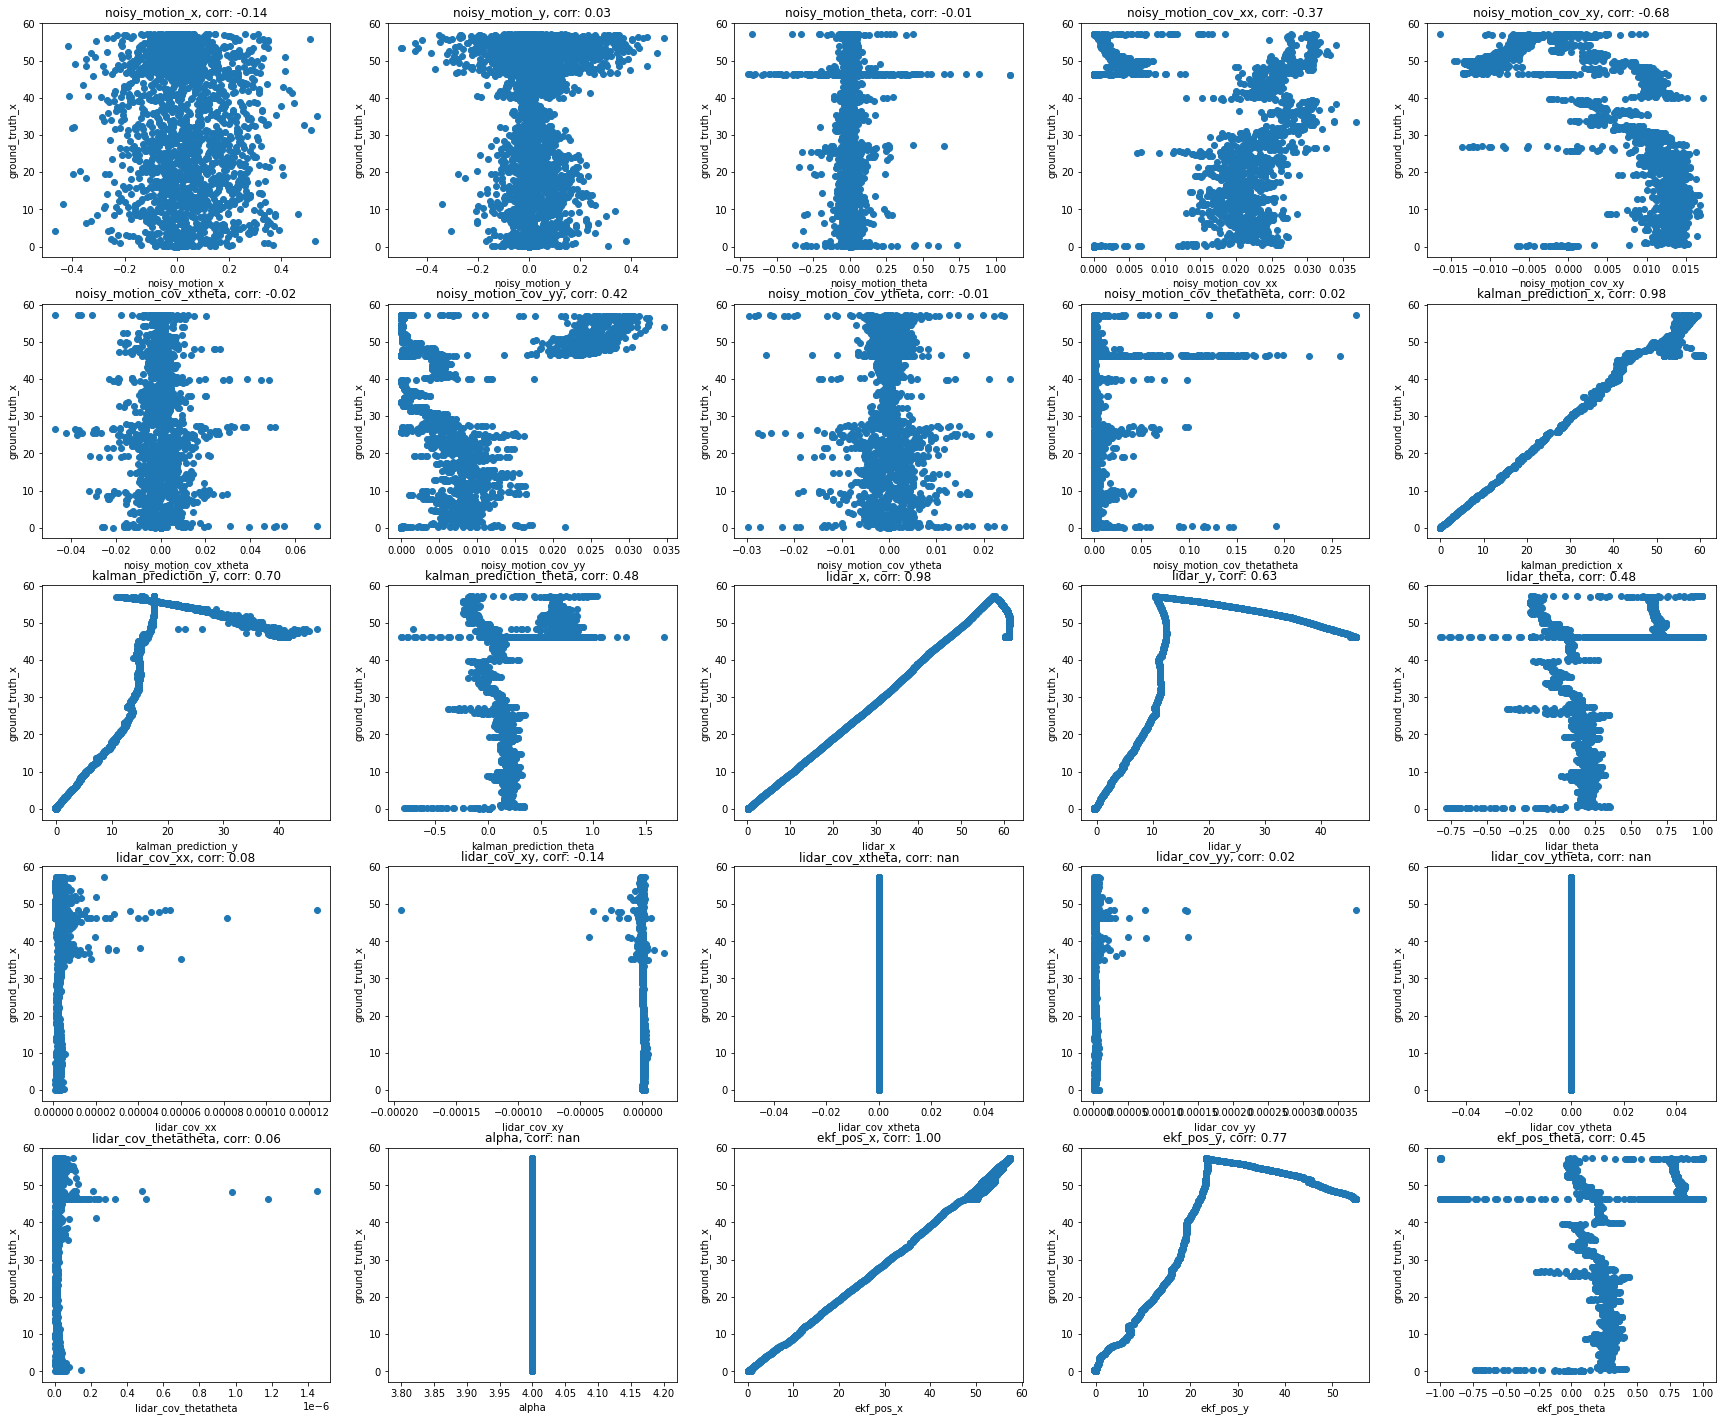

In [13]:
# cols = df_2.columns

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,25))
for i in range(1, len(cols_2)+1):
    print(df_2.columns[i-1])
    # if df_2.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(5,5,i)
    plt.scatter(df_2[cols_2[i-1]], df_2['ground_truth_x'])
    plt.xlabel(cols_2[i-1])
    plt.ylabel('ground_truth_x')
    plt.title(f'{cols_2[i-1]}, corr: {gt_corr_x_2[cols_2[i-1]]:.2f}')

plt.show()

### Vs GT Y

noisy_motion_x
noisy_motion_y
noisy_motion_theta
noisy_motion_cov_xx
noisy_motion_cov_xy
noisy_motion_cov_xtheta
noisy_motion_cov_yy
noisy_motion_cov_ytheta
noisy_motion_cov_thetatheta
kalman_prediction_x
kalman_prediction_y
kalman_prediction_theta
lidar_x
lidar_y
lidar_theta
lidar_cov_xx
lidar_cov_xy
lidar_cov_xtheta
lidar_cov_yy
lidar_cov_ytheta
lidar_cov_thetatheta
ground_truth_x
ground_truth_y
ground_truth_theta
alpha
ekf_pos_x


ValueError: num must be 1 <= num <= 25, not 26

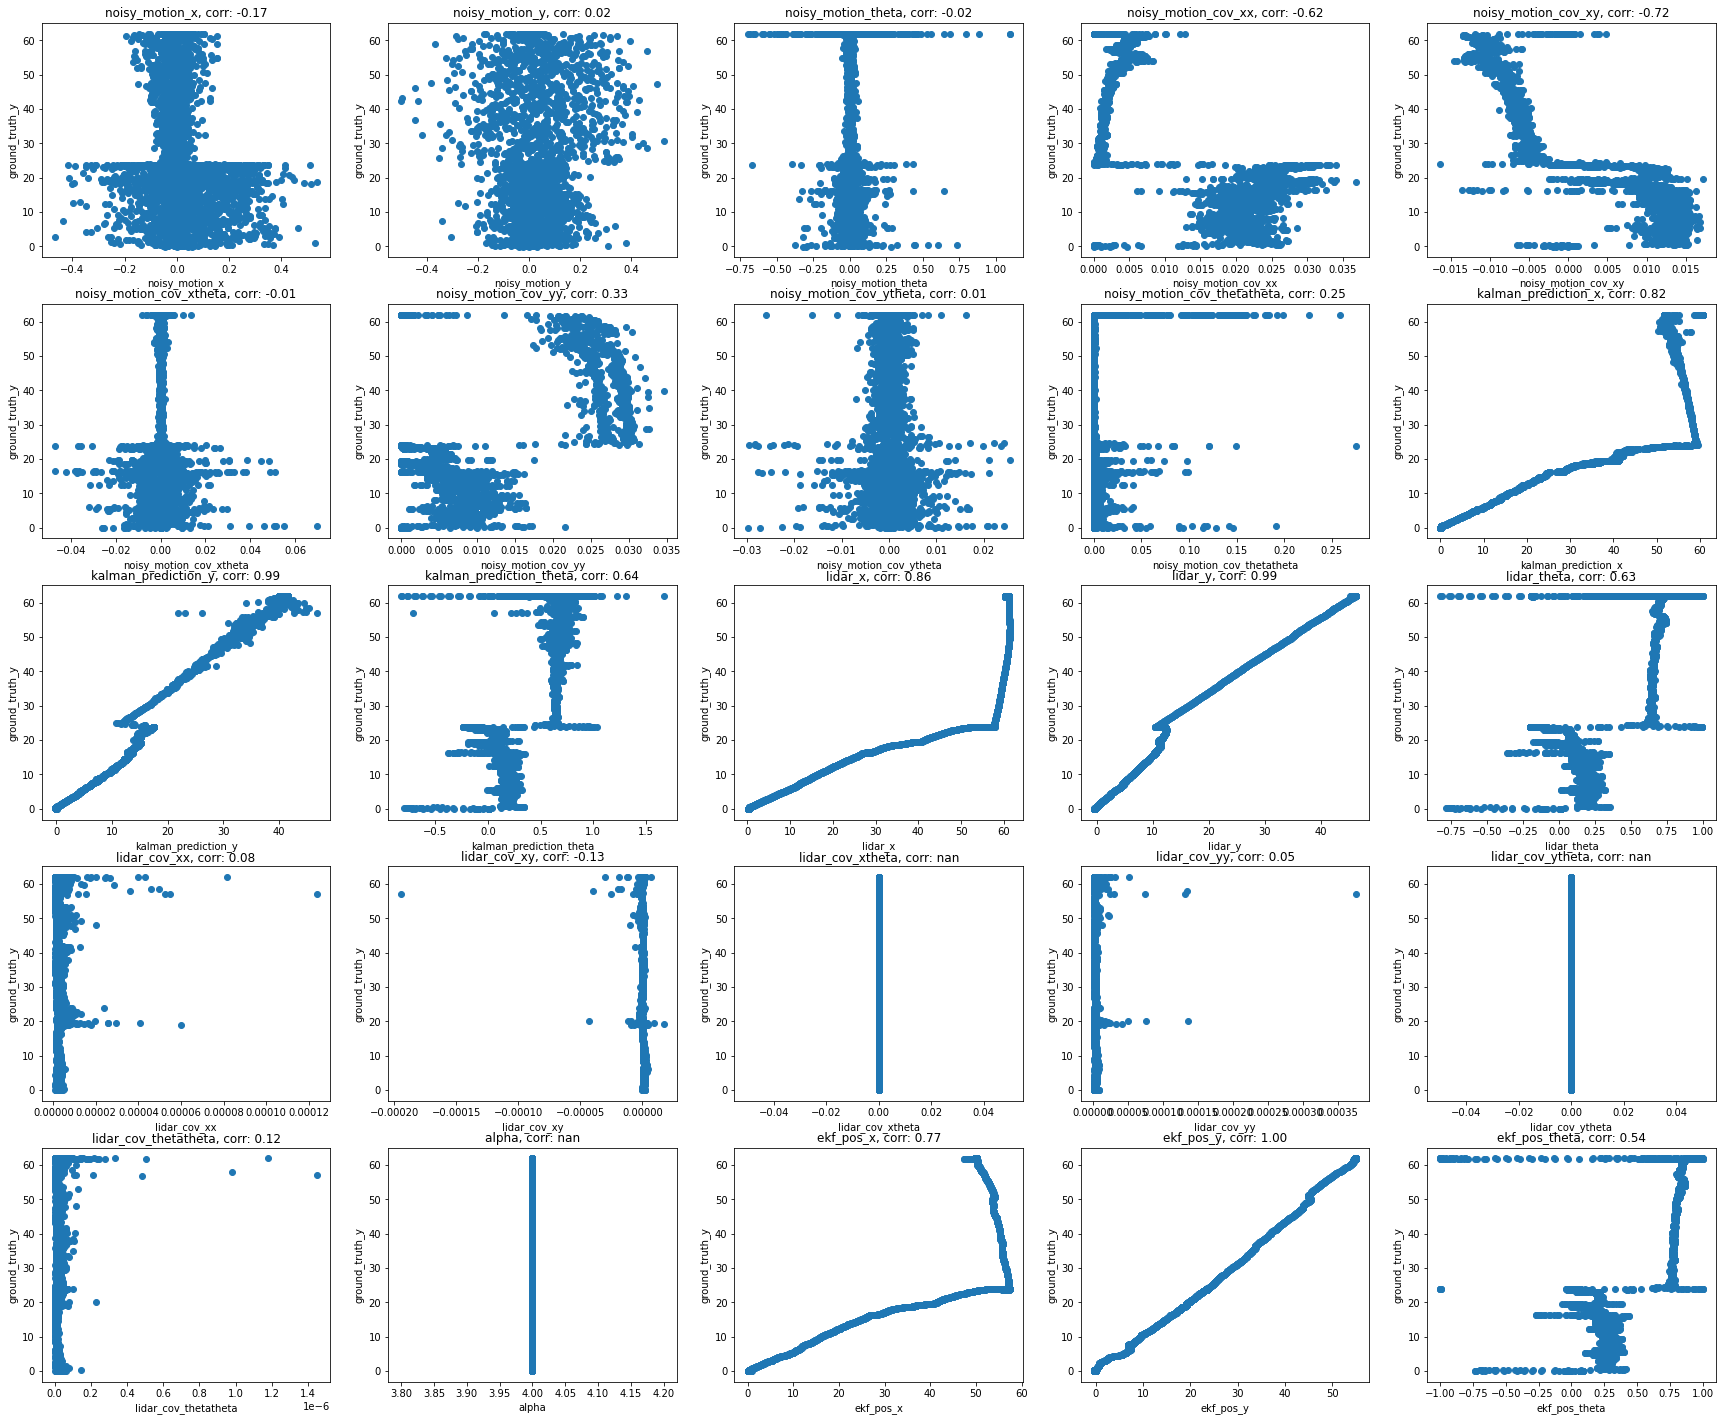

In [ ]:
# cols = df_2.columns

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,25))
for i in range(1, len(cols_2)+1):
    print(df_2.columns[i-1])
    # if df_2.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(5,5,i)
    plt.scatter(df_2[cols_2[i-1]], df_2['ground_truth_y'])
    plt.xlabel(cols_2[i-1])
    plt.ylabel('ground_truth_y')
    plt.title(f'{cols_2[i-1]}, corr: {gt_corr_y_2[cols_2[i-1]]:.2f}')
plt.show()

### Vs GT theta

noisy_motion_x
noisy_motion_y
noisy_motion_theta
noisy_motion_cov_xx
noisy_motion_cov_xy
noisy_motion_cov_xtheta
noisy_motion_cov_yy
noisy_motion_cov_ytheta
noisy_motion_cov_thetatheta
kalman_prediction_x
kalman_prediction_y
kalman_prediction_theta
lidar_x
lidar_y
lidar_theta
lidar_cov_xx
lidar_cov_xy
lidar_cov_xtheta
lidar_cov_yy
lidar_cov_ytheta
lidar_cov_thetatheta
ground_truth_x
ground_truth_y
ground_truth_theta
alpha
ekf_pos_x


ValueError: num must be 1 <= num <= 25, not 26

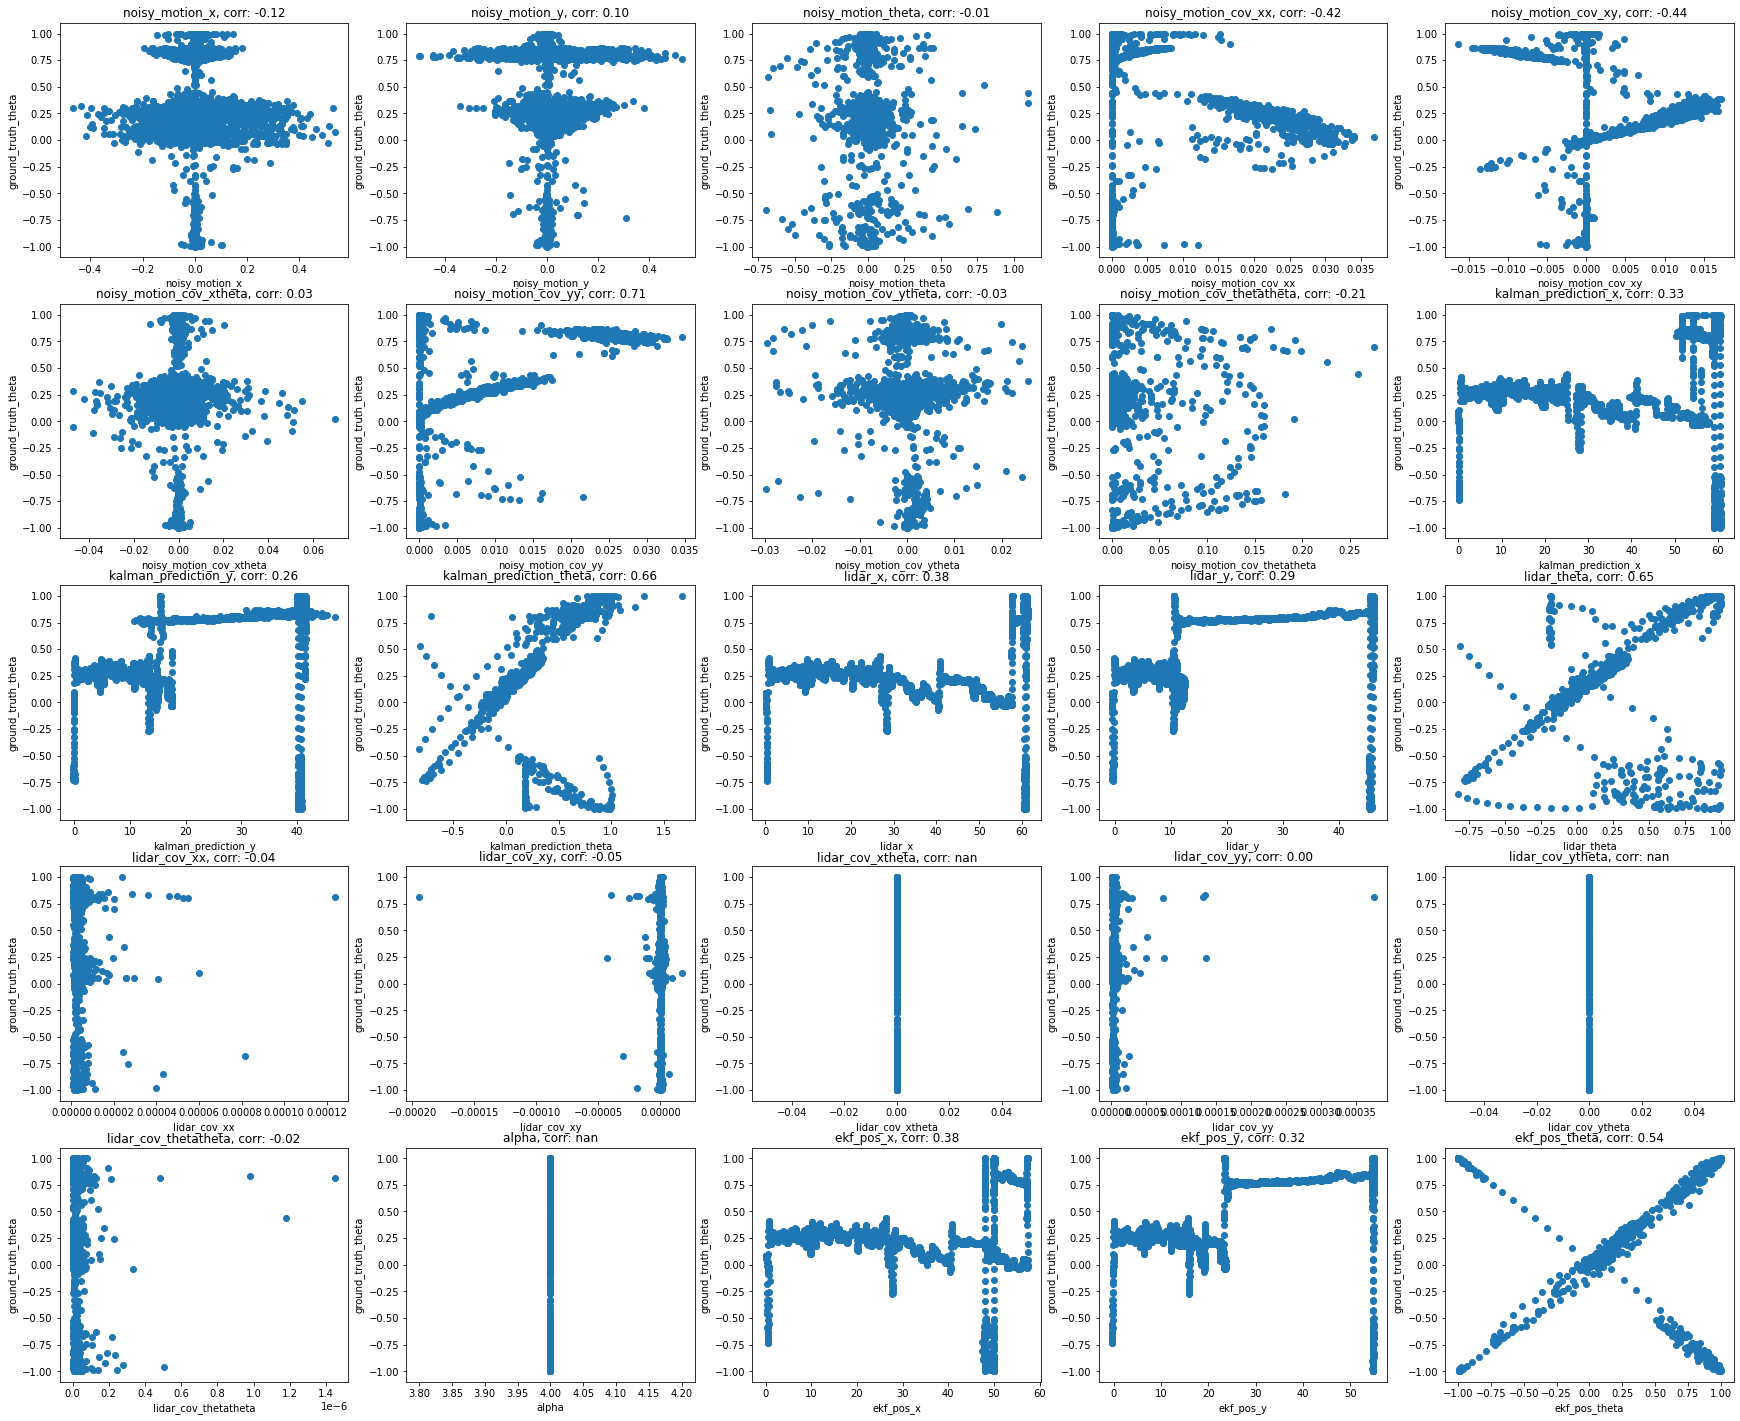

In [ ]:
# cols = df_2.columns

# scatter plot of all vars with ground truth
plt.figure(figsize=(30,25))
for i in range(1, len(cols_2)+1):
    print(df_2.columns[i-1])
    # if df_2.columns[i-1] == 'ground truth':
    #     continue
    plt.subplot(5,5,i)
    plt.scatter(df_2[cols_2[i-1]], df_2['ground_truth_theta'])
    plt.xlabel(cols_2[i-1])
    plt.ylabel('ground_truth_theta')
    # plt.title(cols_2[i-1])
    plt.title(f'{cols_2[i-1]}, corr: {gt_corr_theta_2[cols_2[i-1]]:.2f}')


plt.show()

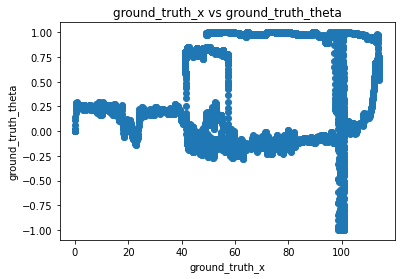

In [ ]:
plt.scatter(df_2['ground_truth_x'], df_2['ground_truth_theta'])
plt.xlabel('ground_truth_x')
plt.ylabel('ground_truth_theta')
plt.title('ground_truth_x vs ground_truth_theta')
plt.show()

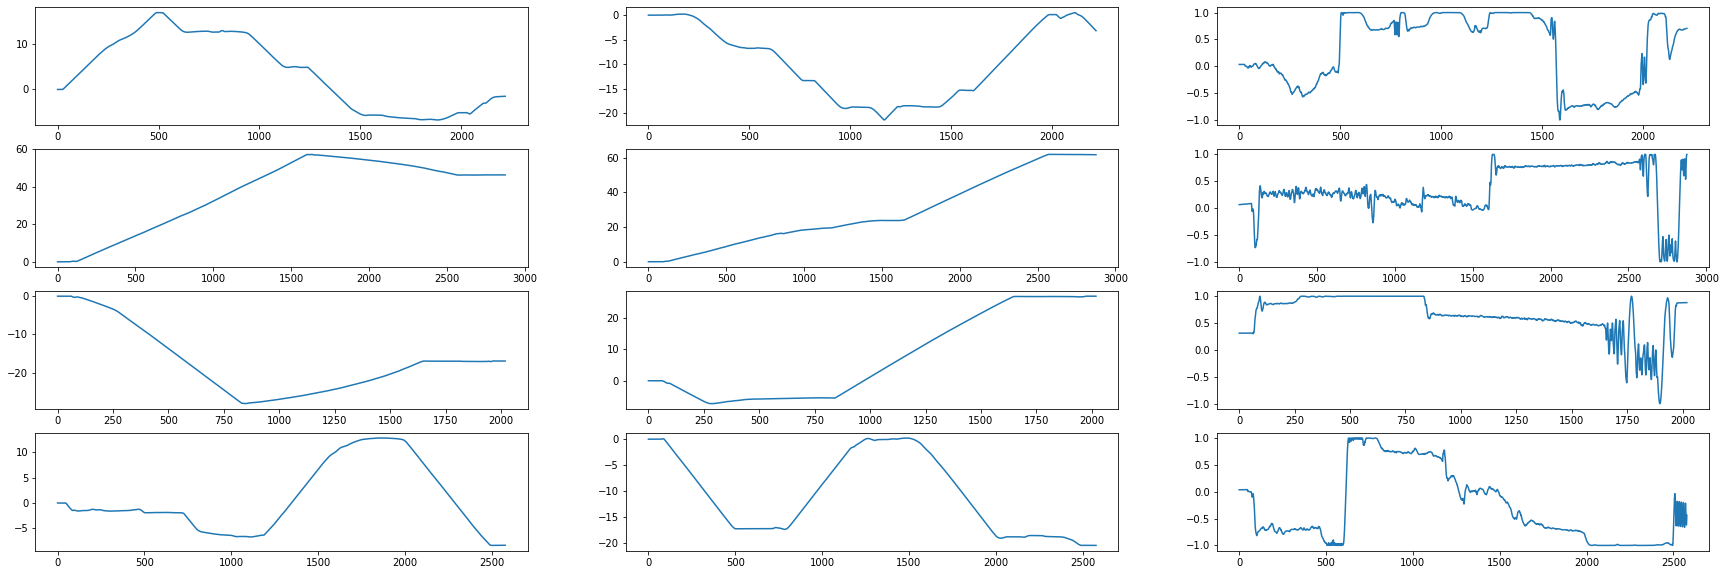

In [ ]:
plt.figure(figsize=(30,10))

for i in range(len(csv_list_2d)):
    df_2 = pd.read_csv(os.path.join(DATA_DIR_2D, csv_list_2d[i]))
    cols_2 = [i for i in df_2.columns if 'ground_truth' not in i]
    # add main title for this row



    # plt.title(csv_list_2d[i])

    plt.subplot(len(csv_list_2d),3, (i)*3+ 1)
    plt.plot(range(len(df_2)), df_2['ground_truth_x'])
    
    plt.subplot(len(csv_list_2d),3,(i)*3+2)
    plt.plot(range(len(df_2)), df_2['ground_truth_y'])
    
    plt.subplot(len(csv_list_2d),3,(i)*3+ 3)
    plt.plot(range(len(df_2)), df_2['ground_truth_theta'])
    

    # plt.xlabel('ground_truth_x')
    # plt.ylabel('ground_truth_theta')
    # plt.title('ground_truth_x vs ground_truth_theta')
plt.show()

## Robo Trajectory/Path

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

In [10]:
fb_campus_vis_csv_path = "data/2D/generated_data/generated_data_fbcampus_alpha_4.csv"
intel_vis_csv_path = "data/2D/generated_data/generated_data_intel_alpha_4.csv"

vis_cols = ["ground_truth_x", "ground_truth_y", "ground_truth_theta"]

In [25]:
def plot_trajectory(df, alpha = 0.5, circle_size = 2, env_name = "FB Campus", plt_style = "fivethirtyeight",
                    line_color = "#03b1fc", start_circle_color = "#7048e8", end_circle_color = "#3dad9e"):
    plt.figure(figsize=(10,8))
    with plt.style.context(plt_style):
        plt.plot(df["ground_truth_x"], df["ground_truth_y"], line_color, label="Intel", alpha=alpha, 
                path_effects= [SimpleLineShadow(), Normal()], )

        c1 = plt.Circle((df['ground_truth_x'].to_list()[0], df['ground_truth_y'].to_list()[0]), circle_size, color=start_circle_color)
        plt.gca().add_artist(c1)

        c2 = plt.Circle((df['ground_truth_x'].to_list()[-1], df['ground_truth_y'].to_list()[-1]), circle_size, color=end_circle_color)
        plt.gca().add_artist(c2)

        plt.xlabel("X")
        plt.ylabel("Y")

        plt.legend(['Trajectory', 'Start', 'End'])
        plt.title(f"Robot rajectory in the {env_name} env")

        plt.show()

In [26]:
intel_vis_df = pd.read_csv(intel_vis_csv_path).dropna()
fb_campus_df = pd.read_csv(fb_campus_vis_csv_path).dropna()

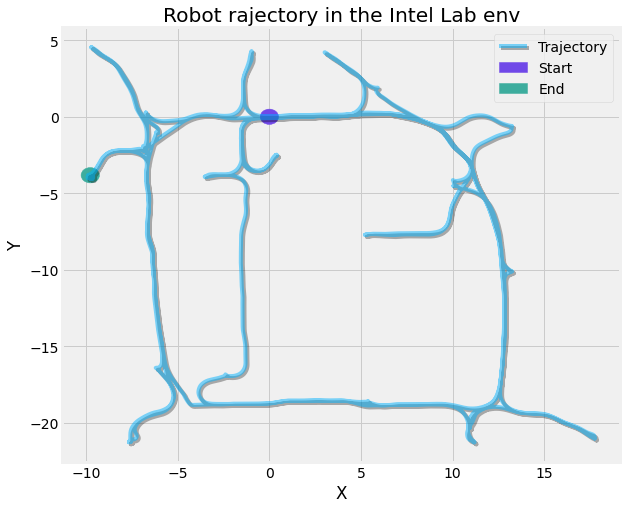

In [30]:
plot_trajectory(intel_vis_df, circle_size=0.5, env_name="Intel Lab")

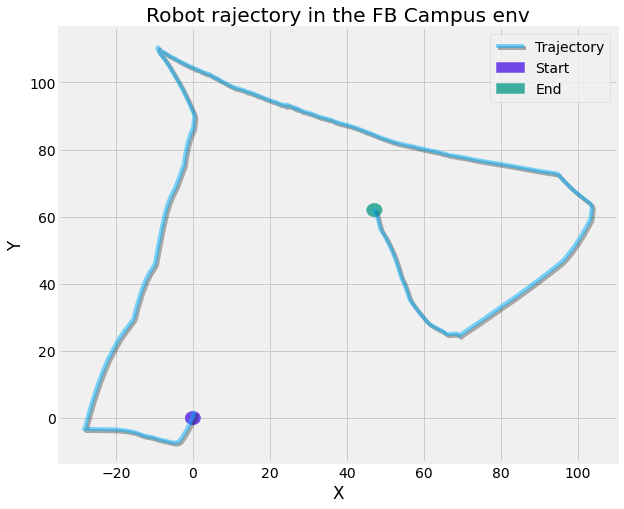

In [29]:
plot_trajectory(fb_campus_df, circle_size=2, env_name="FB Campus")

## Results Tables

In [32]:
import pandas as pd
import os